<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обработка-данных" data-toc-modified-id="Обработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обработка данных</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#Forest-🌳🌲" data-toc-modified-id="Forest-🌳🌲-4.0.2"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>Forest 🌳🌲</a></span></li><li><span><a href="#CatBoost-🐈" data-toc-modified-id="CatBoost-🐈-4.0.3"><span class="toc-item-num">4.0.3&nbsp;&nbsp;</span>CatBoost 🐈</a></span></li><li><span><a href="#LightGBM-c-сеткой-параметров" data-toc-modified-id="LightGBM-c-сеткой-параметров-4.0.4"><span class="toc-item-num">4.0.4&nbsp;&nbsp;</span>LightGBM c сеткой параметров</a></span></li><li><span><a href="#Linear-Regression-+-CatBoost" data-toc-modified-id="Linear-Regression-+-CatBoost-4.0.5"><span class="toc-item-num">4.0.5&nbsp;&nbsp;</span>Linear Regression + CatBoost</a></span></li></ul></li><li><span><a href="#https://www.youtube.com/watch?v=GzdWUVmkeuY&amp;t=983s" data-toc-modified-id="https://www.youtube.com/watch?v=GzdWUVmkeuY&amp;t=983s-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>https://www.youtube.com/watch?v=GzdWUVmkeuY&amp;t=983s</a></span><ul class="toc-item"><li><span><a href="#ARIMA-с-сеткой-параметров-😶☠️" data-toc-modified-id="ARIMA-с-сеткой-параметров-😶☠️-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>ARIMA с сеткой параметров 😶☠️</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

from sklearn.model_selection import train_test_split, TimeSeriesSplit
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error

In [159]:
data = pd.read_csv('/datasets/taxi.csv', parse_dates=['datetime'], index_col='datetime')
data

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
...,...
2018-08-31 23:10:00,32
2018-08-31 23:20:00,24
2018-08-31 23:30:00,27


In [160]:
data.isna().sum()

num_orders    0
dtype: int64

In [161]:
data = data.resample('1H').sum()

## Анализ

<AxesSubplot:xlabel='datetime'>

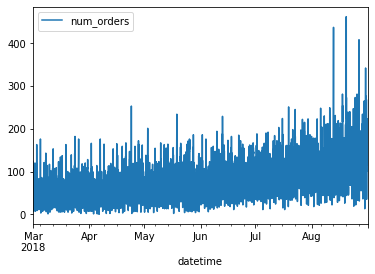

In [162]:
data.plot()

In [163]:
data.index.is_monotonic_increasing

True

<AxesSubplot:xlabel='datetime'>

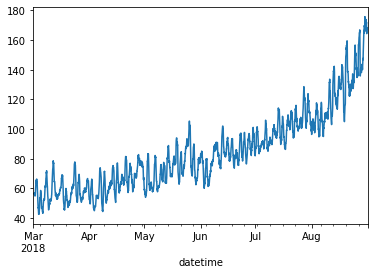

In [164]:
decomposed = seasonal_decompose(data)
decomposed.trend.plot()

<AxesSubplot:xlabel='datetime'>

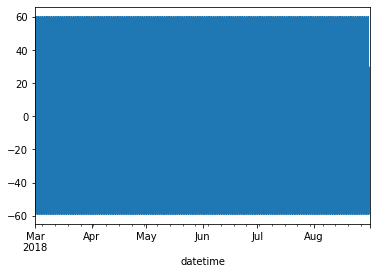

In [165]:
decomposed.seasonal.plot()

<AxesSubplot:xlabel='datetime'>

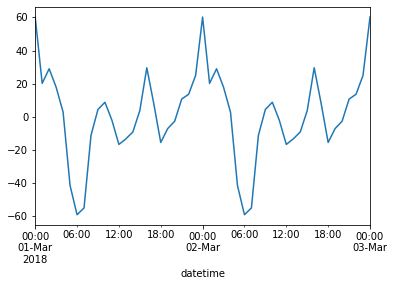

In [166]:
decomposed.seasonal['2018-03-01 00:00:00':'2018-03-03 00:00:00'].plot()

<AxesSubplot:xlabel='datetime'>

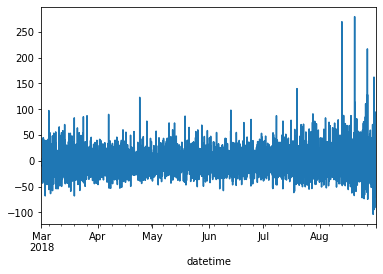

In [167]:
decomposed.resid.plot()

## Обработка данных

In [168]:
def prepare_data(data):
    df = data.copy()
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    df['hour'] = df.index.hour
    df['lag1'] = df['num_orders'].shift(1, fill_value=0)
    df['lag2'] = df['num_orders'].shift(2, fill_value=0)
    df['lag3'] = df['num_orders'].shift(3, fill_value=0)
    df['lag24'] = df['num_orders'].shift(24, fill_value=0) # Это значение поможет модели, так как в данных есть суточная сезонность
    df['rolling_mean'] = df['num_orders'].rolling(10).mean().shift(1)
    df.iloc[:10]['rolling_mean'] = df.iloc[10]['rolling_mean']
    return df

In [169]:
df = prepare_data(data)

/tmp/ipykernel_31/352213152.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:10]['rolling_mean'] = df.iloc[10]['rolling_mean']


In [170]:
df

,num_orders,day,dayofweek,hour,lag1,lag2,lag3,lag24,rolling_mean
datetime,,,,,,,,,
2018-03-01 00:00:00,124,1,3,0,0,0,0,0,52.5
2018-03-01 01:00:00,85,1,3,1,124,0,0,0,52.5
2018-03-01 02:00:00,71,1,3,2,85,124,0,0,52.5
2018-03-01 03:00:00,66,1,3,3,71,85,124,0,52.5
2018-03-01 04:00:00,43,1,3,4,66,71,85,0,52.5
...,...,...,...,...,...,...,...,...,...
2018-08-31 19:00:00,136,31,4,19,207,217,197,72,173.3
2018-08-31 20:00:00,154,31,4,20,136,207,217,142,166.6
2018-08-31 21:00:00,159,31,4,21,154,136,207,198,162.9


## Обучение

Разделим данные в отношении 80/10/10, учитывая порядок данных

#### Linear Regression

In [171]:
X_train, X_valid, y_train, y_valid = \
train_test_split(df.drop('num_orders', axis=1), df['num_orders'], test_size=0.2, shuffle=False)
X_valid, X_test, y_valid, y_test = \
train_test_split(X_valid, y_valid, test_size=0.5, shuffle=False)

In [172]:
X_train.shape, X_valid.shape, X_test.shape

((3532, 8), (442, 8), (442, 8))

In [173]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [174]:
mean_squared_error(y_valid, lin_reg.predict(X_valid)) ** 0.5

35.658903749173724

#### Forest 🌳🌲

In [175]:
%%time
rand_for = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rand_for.fit(X_train, y_train)

CPU times: user 1.41 s, sys: 18.7 ms, total: 1.43 s
Wall time: 1.44 s


RandomForestRegressor(n_jobs=-1)

In [176]:
mean_squared_error(y_train, rand_for.predict(X_train)) ** 0.5

8.20496158038987

In [177]:
mean_squared_error(y_valid, rand_for.predict(X_valid)) ** 0.5

33.32923228090304

#### CatBoost 🐈

In [189]:
%%time
tscv = TimeSeriesSplit(n_splits=3)
catboost_params = {'iterations': [500, 1000, 2000], 'max_depth': [-1, 3, 5]}
grid_cat = GridSearchCV(CatBoostRegressor(verbose=False), catboost_params, cv=tscv)
grid_cat.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/catboost/core.py", line 5299, in fit
    return self._fit(X, y, cat_features, None, None, None, sample_weight, None, None, None, None, baseline,
  File "/opt/conda/lib/python3.9/site-packages/catboost/core.py", line 2021, in _fit
    train_params = self._prepare_train_params(
  File "/opt/conda/lib/python3.9/site-packages/catboost/core.py", line 1953, in _prepare_train_params
    _check_train_params(params)
  File "_catboost.pyx", line 5839, in _catboost._check_train_params
  File "_catboost.pyx", line 5858, in _catboost._check_train

CPU times: user 18.2 s, sys: 1.61 s, total: 19.8 s
Wall time: 35.1 s


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
             estimator=<catboost.core.CatBoostRegressor object at 0x7f73fc928100>,
             param_grid={'iterations': [500, 1000, 2000],
                         'max_depth': [-1, 3, 5]})

In [190]:
grid_cat.best_params_

{'iterations': 1000, 'max_depth': 3}

In [191]:
cat = grid_cat.best_estimator_

In [192]:
mean_squared_error(y_train, cat.predict(X_train)) ** 0.5

18.13162306027037

In [193]:
mean_squared_error(y_valid, cat.predict(X_valid)) ** 0.5

31.957358062099942

#### LightGBM c сеткой параметров

In [23]:
%%time
lgbm = LGBMRegressor()
tscv = TimeSeriesSplit(n_splits=3)
params = {'learning_rate': [0.05, 0.1, 0.2], 'max_depth': [-1, 3, 5]}
grid = GridSearchCV(lgbm, params, cv=tscv)
grid.fit(X_train, y_train)
grid.best_params_

CPU times: user 6min 9s, sys: 3.32 s, total: 6min 13s
Wall time: 6min 16s


{'learning_rate': 0.2, 'max_depth': 3}

In [24]:
lgbm = grid.best_estimator_

In [25]:
mean_squared_error(y_train, lgbm.predict(X_train)) ** 0.5

14.760962571496421

In [26]:
mean_squared_error(y_valid, lgbm.predict(X_valid)) ** 0.5

28.452858353312145

#### Linear Regression + CatBoost

In [181]:
class CatLinearRegression:
    def __init__(self, iterations=500):
        self.iterations = iterations
    
    def fit(self, X, y):
        linear_reg = LinearRegression()
        linear_reg.fit(X, y)
        prediction_linear = linear_reg.predict(X)
        difference = y.values - pd.Series(prediction_linear).values
        cat = CatBoostRegressor(iterations=self.iterations, verbose=False)
        cat.fit(X, difference)
        self.cat = cat
        self.linear_reg = linear_reg
        
    def predict(self, X):
        prediction_linear = self.linear_reg.predict(X)
        prediction_cat = self.cat.predict(X)
        final_prediction = prediction_linear + prediction_cat
        return final_prediction

In [182]:
%%time
model = CatLinearRegression(iterations=1000)
model.fit(X_train, y_train)

CPU times: user 1.8 s, sys: 212 ms, total: 2.01 s
Wall time: 2.59 s


In [183]:
mean_squared_error(y_train, model.predict(X_train)) ** 0.5

12.997125132746255

In [184]:
mean_squared_error(y_valid, model.predict(X_valid)) ** 0.5

30.929402377020683

#### ARIMA с сеткой параметров 😶☠️

In [31]:
fuller = adfuller(data)
print(f'P-value для утверждения "Ряд не стационарен":', fuller[1])

P-value для утверждения "Ряд не стационарен": 0.028940051402612906


Ряд стационарен по тесту Дики-Фуллера

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


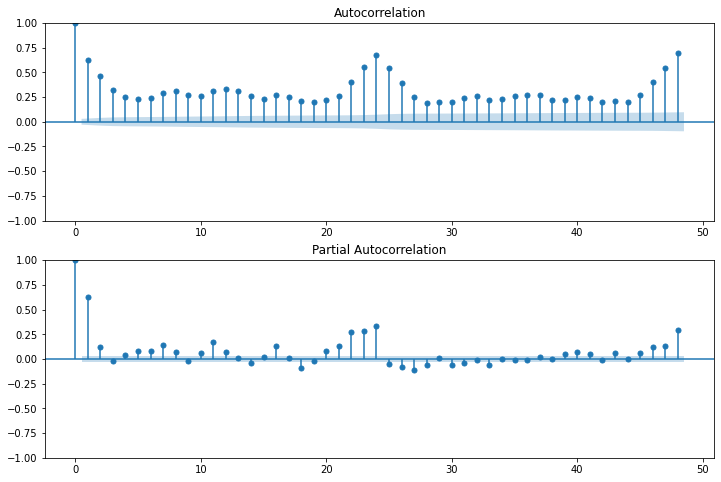

In [32]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data, lags=48, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data, lags=48, ax=ax2)

In [38]:
def grid_arima(data):
    best_model = None
    best_params = None
    best_score = 1000
    d=0
    for p in tqdm_notebook(range(1, 6)):
        for q in tqdm_notebook(range(8, 12)):
            model = sm.tsa.ARIMA(data, order=(p,d,q)).fit()
            pred = model.predict('2018-03-01 00:00:00','2018-07-26 03:00:00', typ='levels')
            if mean_squared_error(data, pred) ** 0.5 < best_score:
                best_score = mean_squared_error(data, pred) ** 0.5
                best_model = model
                best_params = (p, d, q)
    return best_model, best_params

In [39]:
%%time
arima, params = grid_arima(y_train)

/tmp/ipykernel_122/154382274.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for p in tqdm_notebook(range(1, 6)):


  0%|          | 0/5 [00:00<?, ?it/s]

/tmp/ipykernel_122/154382274.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for q in tqdm_notebook(range(8, 12)):


  0%|          | 0/4 [00:00<?, ?it/s]

/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/tmp/ipykernel_122/154382274.py:7: TqdmDeprecationWarning: This function will be 

  0%|          | 0/4 [00:00<?, ?it/s]

/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: Convergence

  0%|          | 0/4 [00:00<?, ?it/s]

/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarn

  0%|          | 0/4 [00:00<?, ?it/s]

/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihoo

  0%|          | 0/4 [00:00<?, ?it/s]

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/

CPU times: user 14min 5s, sys: 18min 58s, total: 33min 3s
Wall time: 33min 10s


In [45]:
y_valid

datetime
2018-07-26 04:00:00    131
2018-07-26 05:00:00     83
2018-07-26 06:00:00     21
2018-07-26 07:00:00     39
2018-07-26 08:00:00     80
                      ... 
2018-08-13 09:00:00    137
2018-08-13 10:00:00    156
2018-08-13 11:00:00    144
2018-08-13 12:00:00     92
2018-08-13 13:00:00    119
Freq: H, Name: num_orders, Length: 442, dtype: int64

In [43]:
pred = arima.predict('2018-03-01 00:00:00', '2018-07-26 03:00:00', typ='levels')

In [44]:
mean_squared_error(y_train, pred) ** 0.5

27.676352150751985

In [46]:
mean_squared_error(y_valid, \
                   arima.predict('2018-07-26 04:00:00', '2018-08-13 13:00:00', typ='levels')) ** 0.5

56.03059180022258

## Тестирование

Оставлю для предсказания на тестовой выборке сочетание линейной регрессии и catboost, то есть CatLinearRegression

In [185]:
predictions = model.predict(X_test)

In [186]:
mean_squared_error(y_test, predictions) ** 0.5

47.81279911476949

## Вывод

В данной работе была решена задача прогнозирования количества заказов такси от времени. Сначала временной ряд был проанализирован, и у него были выявлены возрастающий тренд и дневная сезонность.Были обучены ансамбли деревьев решений, градиентные бустинги, авторегрессионные модели и сочетание линейной модели и градиентного бустинга, именно эта модель дала наименьшую ошибку RMSE, поэтому именно эта модель была выбрана для оценки на тестовой выборке.

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48